<a href="https://colab.research.google.com/github/MukRodrigues/Projetos-Python/blob/Sturm-Liouville/Fun%C3%A7%C3%A3o_implicita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Plotar a função implícita

$$
\pm x = \int \dfrac{dy}{(C - y^4)^{1/4} }.
$$

In [ ]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt

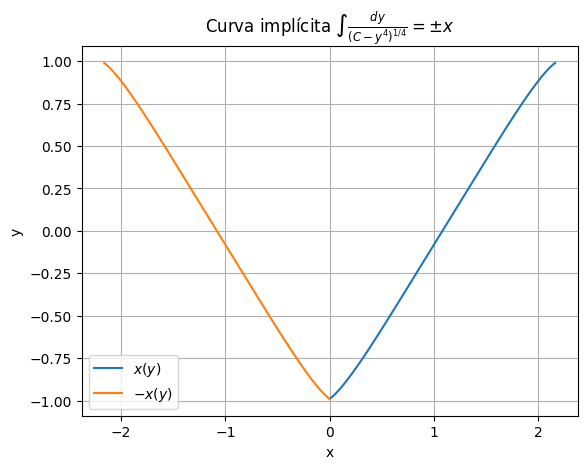

In [ ]:
# Constante
C = 1

# Domain for y (avoid singularities)
y = np.linspace(-0.99, 0.99, 1000)

# Integrand
integrand = 1.0 / (C - y**4)**(1/4)

# Numerical integration using cumulative trapezoidal rule
x = np.zeros_like(y)
for i in range(1, len(y)):
    x[i] = x[i-1] + 0.5 * (integrand[i] + integrand[i-1]) * (y[i] - y[i-1])

# Plot both branches ±x
plt.figure()
plt.plot(x, y, label=r"$x(y)$")
plt.plot(-x, y, label=r"$-x(y)$")
plt.xlabel("x")
plt.ylabel("y")
plt.title(r"Curva implícita $\int \frac{dy}{(C-y^4)^{1/4}}=\pm x$")
plt.grid()
plt.legend()
plt.show()

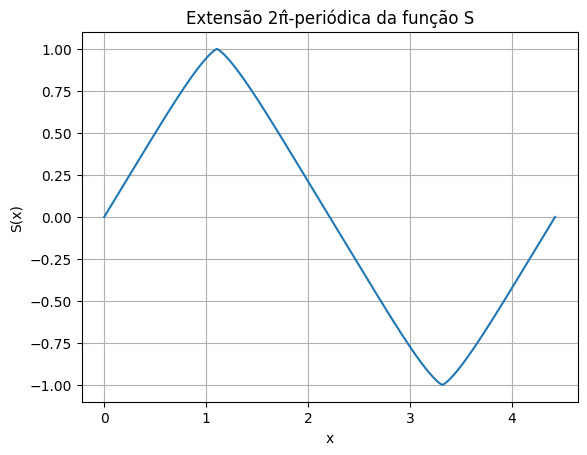

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Number of points
N = 3000
C =1
# Define S0 implicitly via numerical inversion
# x = ∫_0^{S0(x)} ds / sqrt(1 - s^4)

# y-grid for inversion
s = np.linspace(0, 0.999, N)
integrand = 1.0 /(C - s**4)**(1/4)

# cumulative trapezoidal integration
x_s = np.zeros_like(s)
for i in range(1, len(s)):
    x_s[i] = x_s[i-1] + 0.5*(integrand[i] + integrand[i-1])*(s[i]-s[i-1])

# Define hat_pi
hat_pi = x_s[-1] * 2

# Interpolant S0(x)
from scipy.interpolate import interp1d
S0 = interp1d(x_s, s, fill_value="extrapolate")

# Build extended periodic function S(x)
x = np.linspace(0, 2*hat_pi, N)
S = np.zeros_like(x)

for i, xi in enumerate(x):
    if 0 <= xi < hat_pi/2:
        S[i] = S0(xi)
    elif hat_pi/2 <= xi < hat_pi:
        S[i] = S0(hat_pi - xi)
    elif hat_pi <= xi < 3*hat_pi/2:
        S[i] = -S0(xi - hat_pi)
    else:
        S[i] = -S0(2*hat_pi - xi)

# Plot
plt.figure()
plt.plot(x, S)
plt.xlabel("x")
plt.ylabel("S(x)")
plt.title("Extensão 2π̂-periódica da função S")
plt.grid()

plt.show()
